In [84]:

from __future__ import print_function, division
import geopandas as gp
import pandas as pd
import pylab as pl
import numpy as np
import os
import json
import zipfile
import requests
import geopandas as gp
import matplotlib.pyplot as plt
import statsmodels.api as sm
import datetime
from bokeh.plotting import *
from bokeh.models import HoverTool
from collections import OrderedDict
import statsmodels.formula.api as smf
%matplotlib inline

In [2]:
from bokeh.plotting import *
from bokeh.models import HoverTool
from collections import OrderedDict



In [3]:
query = ("https://data.cityofnewyork.us/resource/m46j-75iy.json")
nrg = pd.read_json(query)

In [4]:

! curl -O "https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/mn_mappluto_16v1.zip"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 11.6M  100 11.6M    0     0  21.6M      0 --:--:-- --:--:-- --:--:-- 30.8M


In [5]:
z = zipfile.ZipFile('mn_mappluto_16v1.zip', 'r')
z.extractall("Manhattan")
z.close()

In [6]:

zip_ref = zipfile.ZipFile("mn_mappluto_16v1.zip", 'r')
zip_ref.extractall('Manhattan')
zip_ref.close()


In [7]:
#bsides = os.getenv('PUI2016') + '/' + 'Manhattan' + '/' +'MNMapPLUTO.shp'
link = 'Manhattan' + '/' +'MNMapPLUTO.shp'
bsize = gp.read_file(link)
bsize.head()

,APPBBL,APPDate,Address,AllZoning1,AllZoning2,AreaSource,AssessLand,AssessTot,BBL,BldgArea,...,YearAlter2,YearBuilt,ZMCode,ZipCode,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,ZoneMap,geometry
0,0.000000e+00,None,1592 2 AVENUE,C1-9/TA,None,2,468000.0,1435950.0,1.015450e+09,10885,...,0,1920,None,10028,C1-9,None,None,None,9a,"POLYGON ((997277.2344000041 221816.0936000049,..."
1,1.007230e+09,11/30/2006,263 9 AVENUE,C1-5/R8,None,2,539984.0,11879993.0,1.007238e+09,89203,...,0,1914,None,10001,R8,None,None,None,8d,"POLYGON ((984164.5626000017 211846.0703999996,..."
2,0.000000e+00,None,310 EAST 109 STREET,R7A,None,2,140102.0,343271.0,1.016800e+09,12000,...,0,1910,None,10029,R7A,None,None,None,6b,"POLYGON ((1000742.195800006 227910.6640000045,..."
3,0.000000e+00,None,720 PARK AVENUE,R10/PI/LH-1A,R8B,2,5040000.0,30591900.0,1.013850e+09,203490,...,2006,1928,None,10021,R10,R8B,None,None,8c,"POLYGON ((994007.6886000037 219880.428399995, ..."
4,0.000000e+00,None,3 WEST 83 STREET,R8B,R10A,2,437850.0,1267200.0,1.011970e+09,13839,...,0,1900,None,10024,R8B,R10A,None,None,5d,"POLYGON ((992273.6850000024 224863.4904000014,..."


In [8]:
nrg.columns


Index(['automatic_water_benchmarking_eligible', 'bbls_co_reported', 'borough',
       'co_reported_bbl_status', 'direct_ghg_emissions_mtco2e',
       'dof_benchmarking_submission_status', 'dof_number_of_buildings',
       'dof_property_floor_area_buildngs_and_parking_ft2', 'energy_star_score',
       'indirect_ghg_emissions_mtco2e',
       'municipally_supplied_potable_water_indoor_intensity_gal_ft',
       'nyc_borough_block_and_lot_bbl', 'primary_property_type_self_selected',
       'record_number', 'reported_nyc_building_identificaiton_numbers_bins',
       'reported_property_floor_area_building_s_ft', 'reported_water_method',
       'site_eui_kbtu_ft2', 'source_eui_kbtu_ft2', 'street_name',
       'street_number', 'total_ghg_emissions_mtco2e',
       'weather_normalized_site_eui_kbtu_ft2',
       'weather_normalized_source_eui_kbtu_ft2', 'zip_code'],
      dtype='object')

In [9]:
bsize.columns

Index(['APPBBL', 'APPDate', 'Address', 'AllZoning1', 'AllZoning2',
       'AreaSource', 'AssessLand', 'AssessTot', 'BBL', 'BldgArea', 'BldgClass',
       'BldgDepth', 'BldgFront', 'Block', 'BoroCode', 'Borough', 'BsmtCode',
       'BuiltCode', 'BuiltFAR', 'CB2010', 'CD', 'CT2010', 'ComArea', 'CommFAR',
       'CondoNo', 'Council', 'EDesigNum', 'Easements', 'ExemptLand',
       'ExemptTot', 'Ext', 'FacilFAR', 'FactryArea', 'FireComp', 'GarageArea',
       'HealthArea', 'HistDist', 'IrrLotCode', 'LandUse', 'Landmark', 'Lot',
       'LotArea', 'LotDepth', 'LotFront', 'LotType', 'LtdHeight', 'MAPPLUTO_F',
       'NumBldgs', 'NumFloors', 'OfficeArea', 'OtherArea', 'Overlay1',
       'Overlay2', 'OwnerName', 'OwnerType', 'PLUTOMapID', 'PolicePrct',
       'ProxCode', 'ResArea', 'ResidFAR', 'RetailArea', 'SHAPE_Area',
       'SHAPE_Leng', 'SPDist1', 'SPDist2', 'Sanborn', 'SanitBoro', 'SanitDist',
       'SanitSub', 'SchoolDist', 'SplitZone', 'StrgeArea', 'TaxMap',
       'Tract2010', 'UnitsRe

In [10]:
bsize2 = bsize.drop([u'APPBBL',    u'APPDate',    u'Address', u'AllZoning1',
       u'AllZoning2', u'AreaSource', u'AssessLand',  u'AssessTot', u'BldgArea',  u'BldgClass',  u'BldgDepth',
        u'BldgFront',      u'Block',   u'BoroCode',    u'Borough',
         u'BsmtCode',  u'BuiltCode',   u'BuiltFAR',     u'CB2010',
               u'CD',     u'CT2010',    u'ComArea',    u'CommFAR',
          u'CondoNo',    u'Council',  u'EDesigNum',  u'Easements',
       u'ExemptLand',  u'ExemptTot',        u'Ext',   u'FacilFAR',
       u'FactryArea',   u'FireComp', u'GarageArea', u'HealthArea',
         u'HistDist', u'IrrLotCode',    u'LandUse',   u'Landmark',
              u'Lot',    u'LotArea',   u'LotDepth',   u'LotFront',
          u'LotType',  u'LtdHeight', u'MAPPLUTO_F',   u'NumBldgs',
        u'NumFloors', u'OfficeArea',  u'OtherArea',   u'Overlay1',
         u'Overlay2',  u'OwnerName',  u'OwnerType', u'PLUTOMapID',
       u'PolicePrct',   u'ProxCode',    u'ResArea',   u'ResidFAR',
       u'RetailArea', u'SHAPE_Area', u'SHAPE_Leng',    u'SPDist1',
          u'SPDist2',    u'Sanborn',  u'SanitBoro',  u'SanitDist',
         u'SanitSub', u'SchoolDist',  u'SplitZone',  u'StrgeArea',
           u'TaxMap',  u'Tract2010',   u'UnitsRes',
          u'Version',     u'XCoord',     u'YCoord', u'YearAlter1',
       u'YearAlter2',  u'YearBuilt',     u'ZMCode', u'ZipCode',
        u'ZoneDist1',  u'ZoneDist2',  u'ZoneDist3',  u'ZoneDist4',
          u'ZoneMap',   u'geometry'], axis = 1)

In [11]:
nrg2 = nrg.drop([u'automatic_water_benchmarking_eligible',
       u'borough', u'co_reported_bbl_status', u'direct_ghg_emissions_mtco2e',
       u'dof_benchmarking_submission_status', u'dof_number_of_buildings',
       u'energy_star_score', u'indirect_ghg_emissions_mtco2e',
       u'municipally_supplied_potable_water_indoor_intensity_gal_ft',
       u'primary_property_type_self_selected', u'record_number',
       u'reported_nyc_building_identificaiton_numbers_bins',
       u'reported_water_method',
       u'source_eui_kbtu_ft2', u'street_name',
       u'street_number', u'total_ghg_emissions_mtco2e',
       u'weather_normalized_site_eui_kbtu_ft2',
       u'weather_normalized_source_eui_kbtu_ft2',],axis = 1)

In [12]:
nrg2.columns

Index(['bbls_co_reported', 'dof_property_floor_area_buildngs_and_parking_ft2',
       'nyc_borough_block_and_lot_bbl',
       'reported_property_floor_area_building_s_ft', 'site_eui_kbtu_ft2',
       'zip_code'],
      dtype='object')

In [13]:
nrg2.columns = ['BBL Report','DOF_ft2','BBL','Area ft2','Site_EUI_(kBtu/ft2)','ZipCode']

In [14]:
nrg2.columns

Index(['BBL Report', 'DOF_ft2', 'BBL', 'Area ft2', 'Site_EUI_(kBtu/ft2)',
       'ZipCode'],
      dtype='object')

In [15]:
bsize2.columns

Index(['BBL', 'UnitsTotal'], dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6ecd308b38>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f6ecc8f0f28>]], dtype=object)

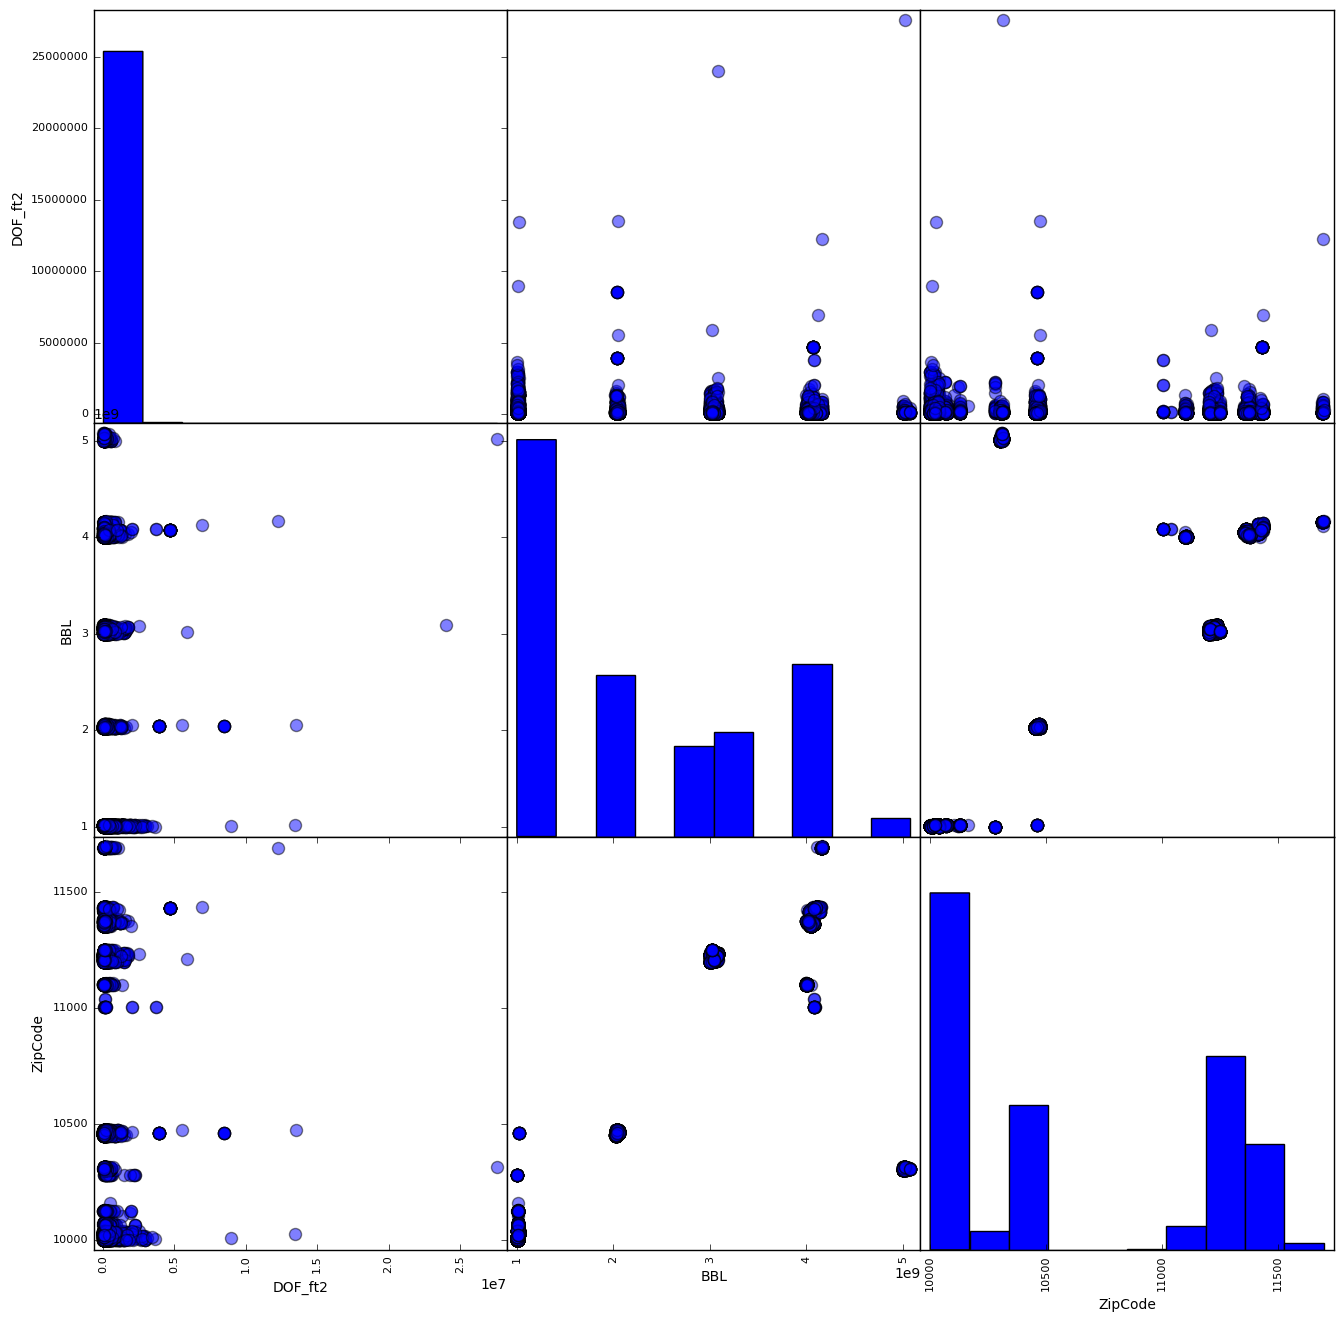

In [16]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix (nrg2, s=300, figsize=(16, 16))

In [17]:
nrg2['Site_EUI_(kBtu/ft2)'] = pd.to_numeric(nrg2['Site_EUI_(kBtu/ft2)'], errors='coarse')

In [18]:
bblnrgdata = pd.merge(bsize2,nrg2, how = 'inner' ,on = ['BBL'])

In [19]:
bblnrgdata.head()

,BBL,UnitsTotal,BBL Report,DOF_ft2,Area ft2,Site_EUI_(kBtu/ft2),ZipCode
0,1.007238e+09,50,1-00723-7501,97563.0,95844,68.7,10001.0
1,1.013850e+09,32,1013850032,203490.0,206989,87.4,10021.0
2,1.021740e+09,72,1021740105,52920.0,52920,140.4,10040.0
3,1.008830e+09,108,1008830058,98359.0,98359,96.5,10016.0
4,1.008570e+09,138,1008570018,140000.0,154000,36.4,10016.0


In [20]:

bblnrgdata[u'Area ft2']= pd.to_numeric(bblnrgdata[u'Area ft2'], errors='coarse')

In [21]:
#Make the total energy total sq foot times kbtu / sqft
bblnrgdata['Total Energy'] = bblnrgdata[u'Area ft2']*bblnrgdata['Site_EUI_(kBtu/ft2)']

In [71]:
pd.to_numeric(bblnrgdata['Total Energy'], errors='coerce')

0       6.584483e+06
1       1.809084e+07
2       7.429968e+06
3       9.491644e+06
4       5.605600e+06
5       3.662750e+06
6                NaN
7       6.749741e+06
8       5.314421e+06
9       1.767349e+07
10               NaN
11      6.151351e+06
12      5.794710e+06
13      1.215829e+07
14               NaN
15      7.268695e+07
16               NaN
17      8.349526e+06
18               NaN
19      4.777727e+06
20      7.499711e+07
21      1.539606e+07
22      1.511625e+07
23      6.132420e+06
24               NaN
25               NaN
26      3.636416e+07
27      2.502538e+06
28               NaN
29      2.841126e+08
            ...     
6462    1.477626e+07
6463    2.499587e+07
6464             NaN
6465    1.703574e+08
6466    1.385800e+08
6467    8.108800e+07
6468    3.589407e+07
6469    5.479784e+07
6470    1.374432e+08
6471    6.043081e+07
6472    3.321776e+07
6473    6.538875e+07
6474    5.641197e+06
6475    2.906933e+08
6476    6.810865e+07
6477    6.645316e+07
6478    6.097

In [22]:
bblnrgdata.head()

,BBL,UnitsTotal,BBL Report,DOF_ft2,Area ft2,Site_EUI_(kBtu/ft2),ZipCode,Total Energy
0,1.007238e+09,50,1-00723-7501,97563.0,95844.0,68.7,10001.0,6584482.8
1,1.013850e+09,32,1013850032,203490.0,206989.0,87.4,10021.0,18090838.6
2,1.021740e+09,72,1021740105,52920.0,52920.0,140.4,10040.0,7429968.0
3,1.008830e+09,108,1008830058,98359.0,98359.0,96.5,10016.0,9491643.5
4,1.008570e+09,138,1008570018,140000.0,154000.0,36.4,10016.0,5605600.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6ecd795be0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f6eccbde7b8>]], dtype=object)

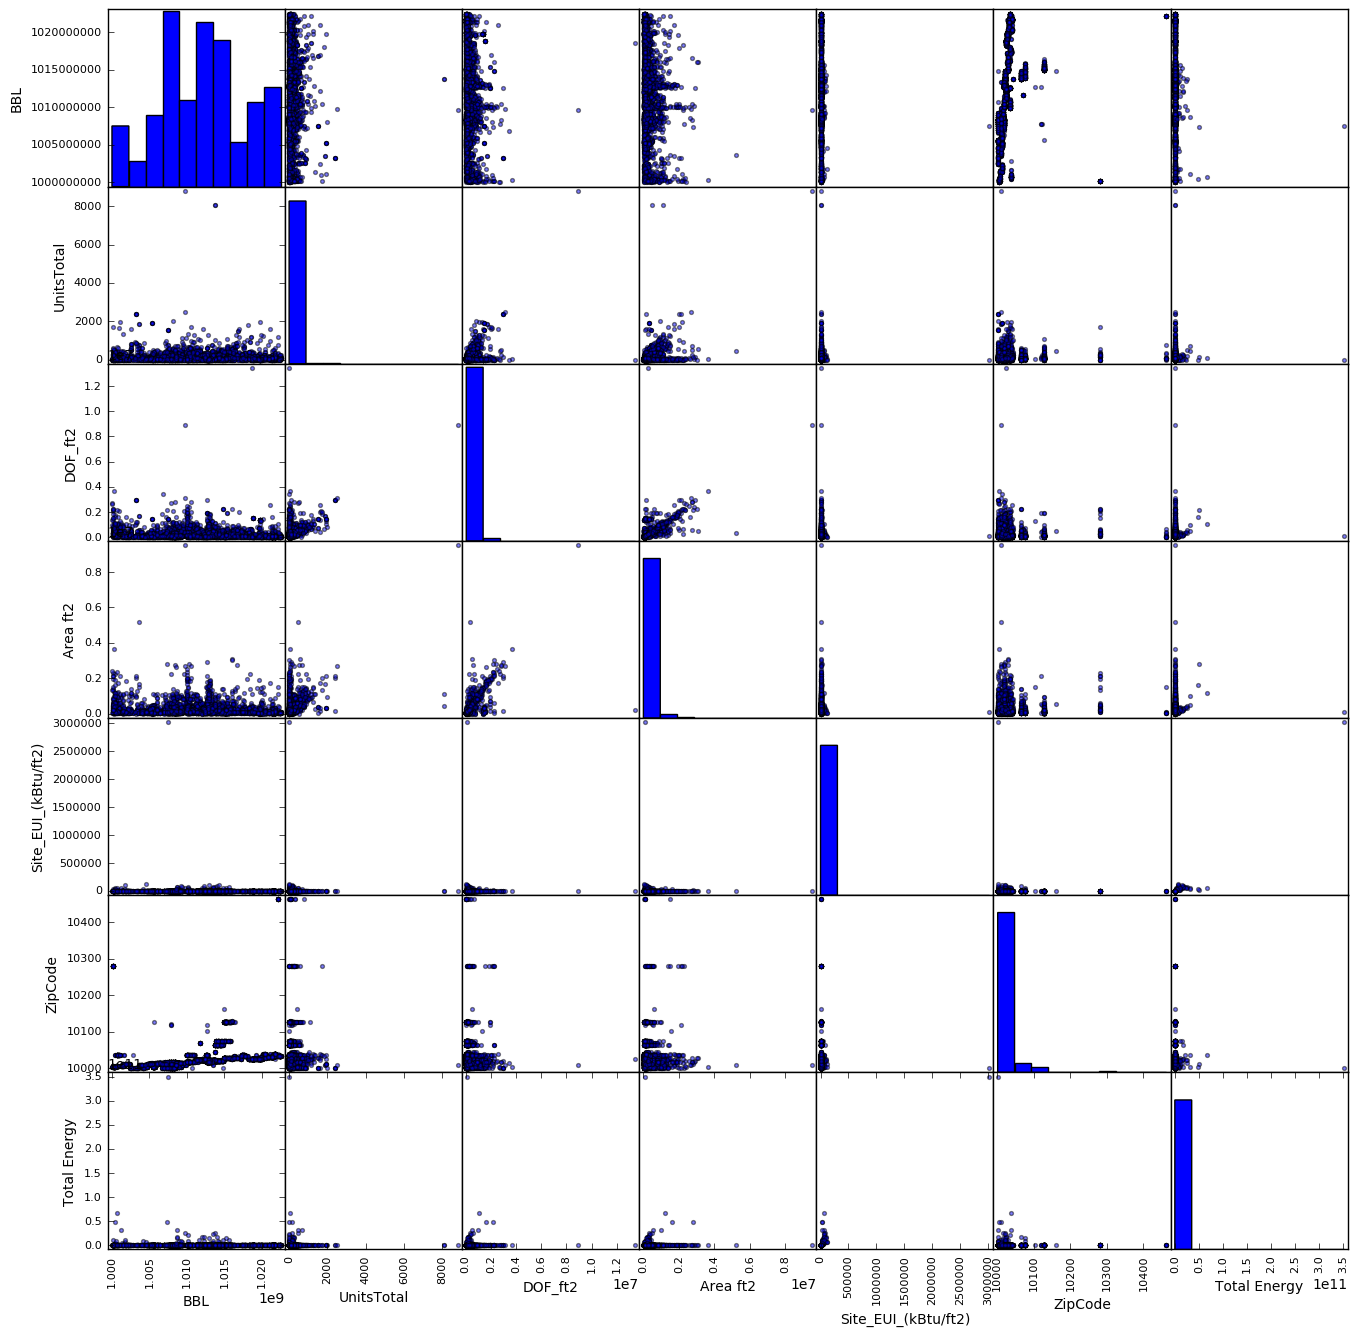

In [23]:
scatter_matrix (bblnrgdata, s=30, figsize=(16,16))

In [ ]:
pd.to_numeric(bblnrgdata['Floor Area - building sq ft.'], errors='coerce')

In [54]:
y = (bblnrgdata.UnitsTotal)
x = (bblnrgdata['Total Energy'])

In [29]:
bblnrgdata.columns
bblnrgdata.head()

,BBL,UnitsTotal,BBL Report,DOF_ft2,Area ft2,Site_EUI_(kBtu/ft2),ZipCode,Total Energy
0,1.007238e+09,50,1-00723-7501,97563.0,95844.0,68.7,10001.0,6584482.8
1,1.013850e+09,32,1013850032,203490.0,206989.0,87.4,10021.0,18090838.6
2,1.021740e+09,72,1021740105,52920.0,52920.0,140.4,10040.0,7429968.0
3,1.008830e+09,108,1008830058,98359.0,98359.0,96.5,10016.0,9491643.5
4,1.008570e+09,138,1008570018,140000.0,154000.0,36.4,10016.0,5605600.0


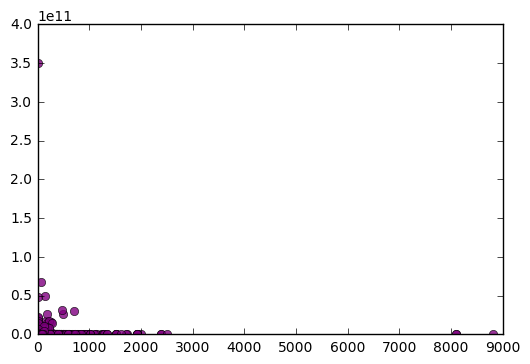

In [43]:
fig =plt.figure()
ax = plt.plot (bblnrgdata.UnitsTotal,bblnrgdata['Total Energy'], 'o', color = 'purple', alpha = 0.8)


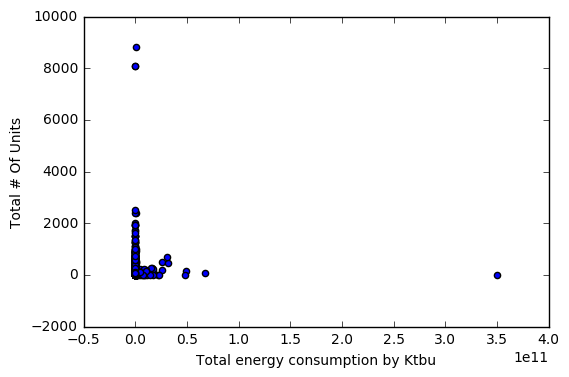

In [56]:


plt.scatter(x, y, s=20)
plt.xlabel("Total energy consumption by Ktbu")
plt.ylabel("Total # Of Units")

In [83]:
#remove outliers using magical formula
bblnrgdata_cut = bblnrgdata[(bblnrgdata['Total Energy'] > 1000) & (bblnrgdata['Total Energy'] < 1e10) &
                            (bblnrgdata['UnitsTotal'] > 1) & (bblnrgdata['UnitsTotal'] < 4000)]


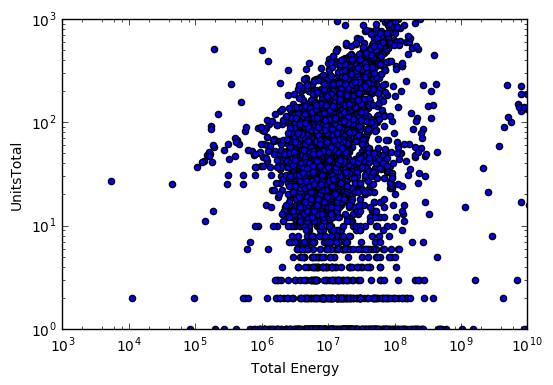

In [77]:
#plotting to scatter plot
bblnrgdata_cut.plot.scatter('Total Energy', 'UnitsTotal', xlim=(1000, 1e10), ylim=(1,1000),loglog=True)

In [67]:
#the chi squared test
chisq_num = (np.log10(bblnrgdata_cut['UnitsTotal']) - bblnrgdata_cut['units_pred'])**2 
chisq = np.sum(chisq_num / np.abs(np.log10(bblnrgdata_cut['UnitsTotal'])))
chisq


1820.9620468849728

In [70]:
#really large number?
bblnrgdata_cut = bblnrgdata[bblnrgdata['Total Energy']>1000]
bblnrgdata_cut.head()

,BBL,UnitsTotal,BBL Report,DOF_ft2,Area ft2,Site_EUI_(kBtu/ft2),ZipCode,Total Energy
0,1.007238e+09,50,1-00723-7501,97563.0,95844.0,68.7,10001.0,6584482.8
1,1.013850e+09,32,1013850032,203490.0,206989.0,87.4,10021.0,18090838.6
2,1.021740e+09,72,1021740105,52920.0,52920.0,140.4,10040.0,7429968.0
3,1.008830e+09,108,1008830058,98359.0,98359.0,96.5,10016.0,9491643.5
4,1.008570e+09,138,1008570018,140000.0,154000.0,36.4,10016.0,5605600.0


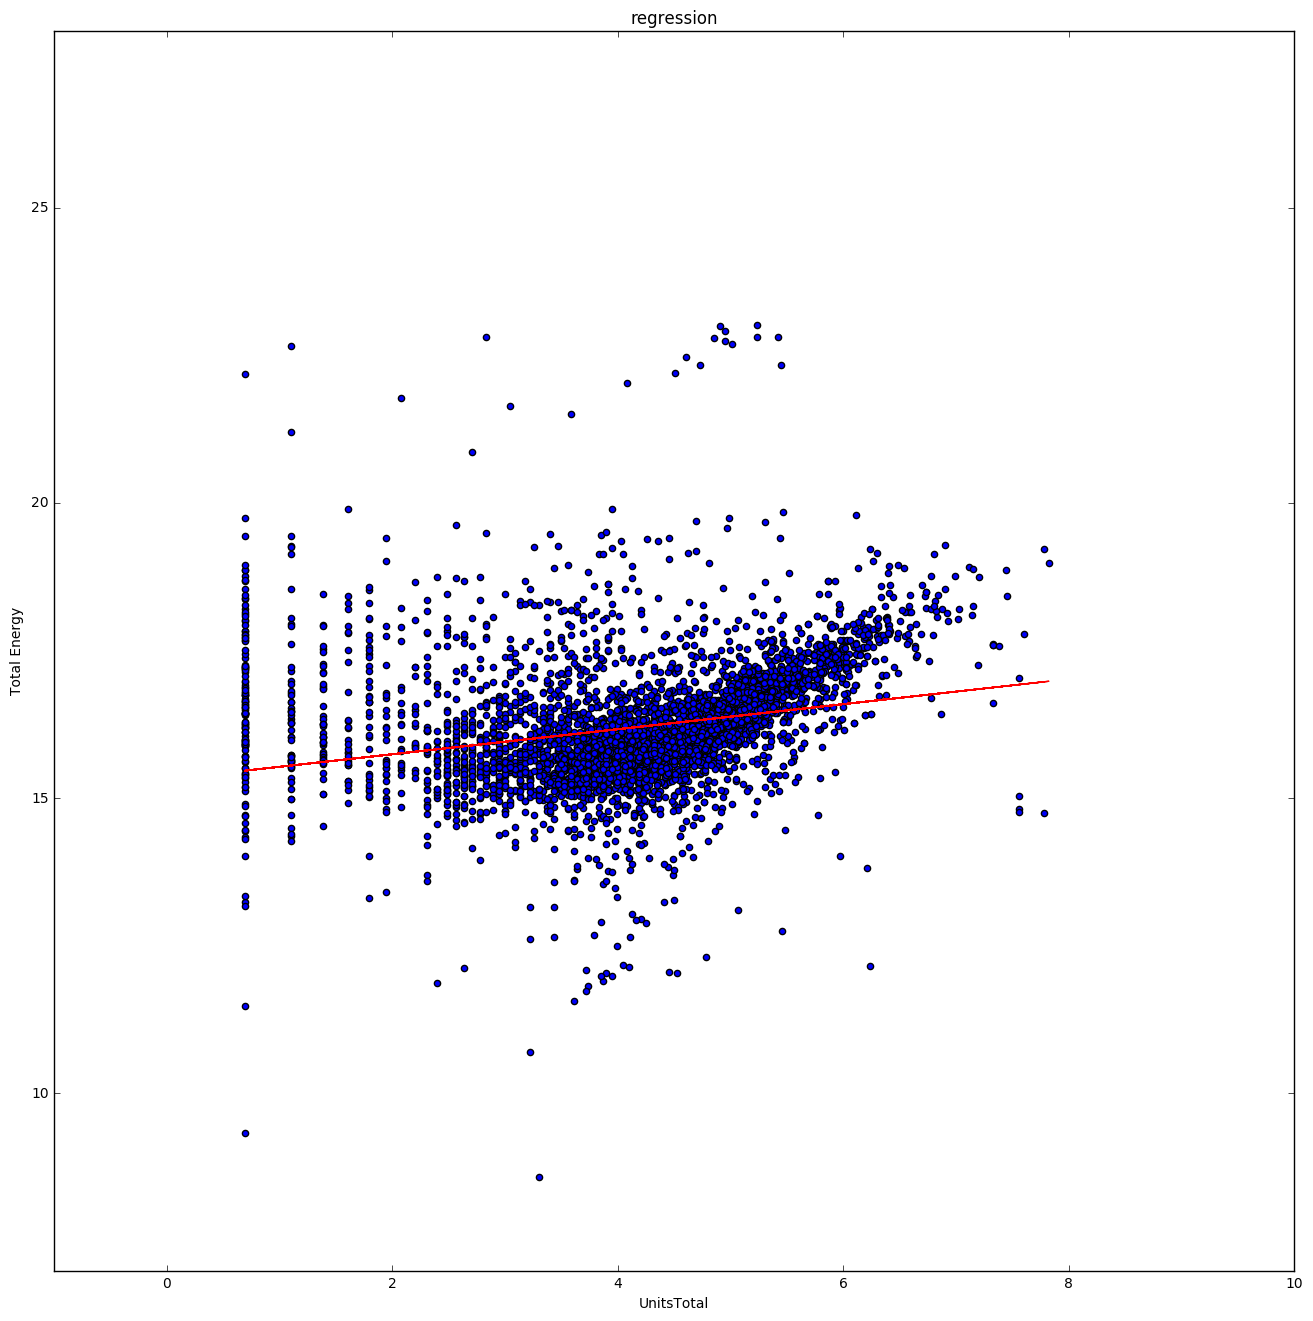

In [93]:
x=np.log(bblnrgdata_cut['UnitsTotal'])
y=np.log(bblnrgdata_cut['Total Energy'])

(m,b) = np.polyfit(x,y,1)
yp = np.polyval([m,b],x)

pl.figure(figsize=(16,16))
pl.title('regression')
pl.xlabel('UnitsTotal')
pl.ylabel('Total Energy')
pl.xlim(-1, 10)
pl.ylim(7, 28)
pl.scatter(x, y)
pl.plot(x, yp, color="red")

pl.show()